Daniela Donado, Sarita Castañeda, Laura Alvarez, Juan Pablo

Importamos las librerias  a utilizar y cargamos los datos

In [172]:
import numpy as np # la necesitamos para operar con vectores y cargar el txt
import matplotlib.pyplot as plt # es necesario para graficar
import pandas as pd

datos = np.genfromtxt("Acero_J_8am.txt", delimiter="\t", skip_header=0, skip_footer=0)
datos = np.delete(datos, [0, 2], axis=0)



Definimos las variables

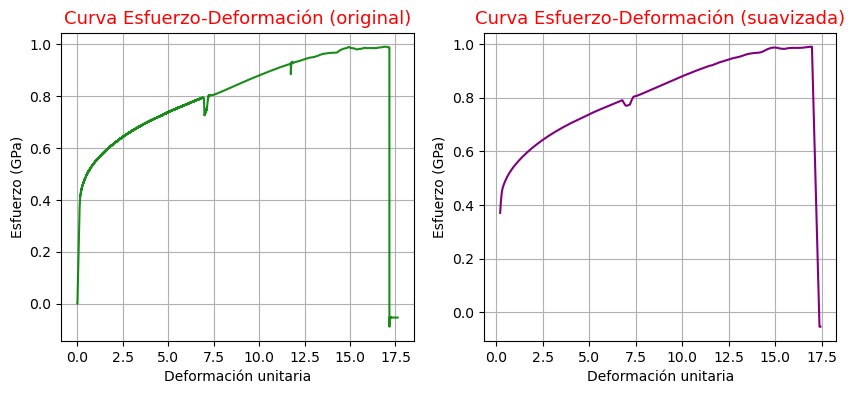

In [173]:
# Definimos las variables
area = (12.12*0.55)  # en mm
area_metros= area*1e-6
long_ini = 50  # en mm

fuerza_N = datos[:, 1]
fuerza_Kn= fuerza_N / 1000  # en kN
esfuerzo = fuerza_Kn / area_metros  # en kN/m² kilopascales
esfuerzo_gigapascales= esfuerzo/1e6 # Giga Pascales
deformacion = datos[:, 0] / long_ini  # Adimensional

# Graficamos

#fig, ax = plt.subplots()
#plt.xlim(0,0.06)
#plt.ylim(0.02,0.15)
'''
ax.plot(deformacion, esfuerzo_gigapascales, color="purple", zorder=3)
ax.set_title("Curva Esfuerzo-Deformación", fontsize=13, color = "red")
ax.set_xlabel("Deformación unitaria")
ax.set_ylabel("Esfuerzo (GPa)")
plt.grid()
'''

df = pd.DataFrame({
    "deformacion": datos[:,0] / long_ini,
    "esfuerzo": esfuerzo_gigapascales
})

# Suavizado con media móvil (ventana de 10 puntos, ajusta según veas)
df["deformacion_suav"] = df["deformacion"].rolling(window=2000).mean()
df["esfuerzo_suav"] = df["esfuerzo"].rolling(window=2000).mean()

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot(df["deformacion"], df["esfuerzo"], color="green", alpha=0.9, label="Original")
ax2.plot(df["deformacion_suav"], df["esfuerzo_suav"], color="purple")
ax1.set_title("Curva Esfuerzo-Deformación (original)", fontsize=13, color="red")
ax1.set_xlabel("Deformación unitaria")
ax1.set_ylabel("Esfuerzo (GPa)")
ax1.grid()

ax2.set_title("Curva Esfuerzo-Deformación (suavizada)", fontsize=13, color="red")
ax2.set_xlabel("Deformación unitaria")
ax2.set_ylabel("Esfuerzo (GPa)")
ax2.grid()

plt.show()



El material observado presenta una zona de elasticidad muy corta en comparación a la zona plástica. Además presenta una elevada pendiente con un módulo de Young de 3.25GPa lo cual corresponde a un material poco elástico y dúctil que presenta una fractura plana. Presenta resistencia a ser deformado al ser una aleación de hierro, carbono  y cromo, lo que explica su comportamiento de dureza.


**Cálculo Módulo de elasticidad**

Para obtenerlo primero calculamos el módulo de Young



El módulo de Young es: 3.25 GPa


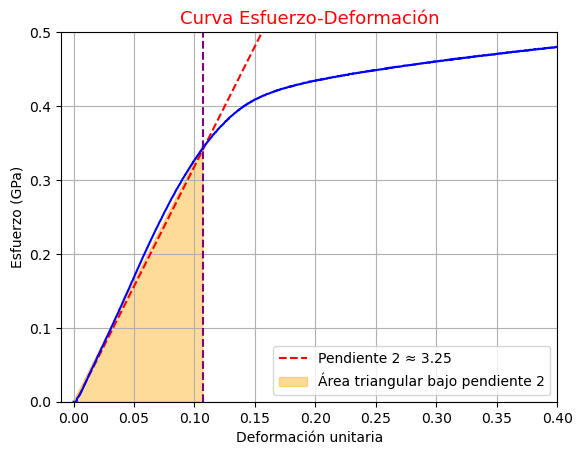

Modulo de young: 3.25
Área del triángulo sombreado: 0.02 (MPa x deformación)


<Figure size 640x480 with 0 Axes>

In [ ]:
#Cálculo Módulo de Young
A=  (0.02,0.06)
B= (0.1,0.32)
m=(B[1]-A[1])/(B[0]-A[0])
print(f"El módulo de Young es: {m} GPa")

#x = np.linspace(0, 1, 100)


fig, ax = plt.subplots()

#Límite de elasticidad
x= np.linspace(0, 18, 10000)
b=0
y= m*(x-0.002)+ b
ax.plot(x, y, "--", color="red", label=f'Pendiente 2 ≈ {m:.2f}')

#Intersección entre ambas rectas
m1 = m
b1 = A[1] - m * A[0]

m2=m
x_des = 0.002
b2 = (A[1]) - m2 * (A[0] + x_des)


x0 = 0.10876
y0 =0.347
b = y0 - m * x0
x_interseccion = (y0/m)
ax.axvline(x_interseccion, color='purple', linestyle='--')

# Graficar la recta con solo dos puntos
ax.set_ylim(0, 0.5)
ax.set_xlim(-0.01,0.4)
ax.plot(deformacion, esfuerzo_gigapascales, color="blue", zorder=3)


esfuerzo_linea_roja = m * x_interseccion

# Coordenadas del triángulo
triangle_x = [0, x_interseccion, x_interseccion]
triangle_y = [0, esfuerzo_linea_roja, 0]

ax.fill(triangle_x, triangle_y, color='orange', alpha=0.4, label='Área triangular bajo pendiente 2')

ax.set_title("Curva Esfuerzo-Deformación", fontsize=13, color = "red")
ax.set_xlabel("Deformación unitaria")
ax.set_ylabel("Esfuerzo (GPa)")
ax.legend()

plt.grid()
plt.show()

plt.savefig("Curva_Def_esfuerzo.jpg", dpi = 1200,bbox_inches = "tight")

print("Modulo de young:", m)
area_triangulo = (m * x_interseccion**2) / 2
print(f"Área del triángulo sombreado: {area_triangulo:.2f} (MPa x deformación)")


**Cálculo Módulo de Resiliencia**

In [86]:
b= 0.10876
h= 0.347
Resiliencia= 0.5*h*b
print(f"El módulo de resiliencia es: {Resiliencia:.2f} GPa")

El módulo de resiliencia es: 0.02 GPa


**Cálculo Límite de Ruptura**

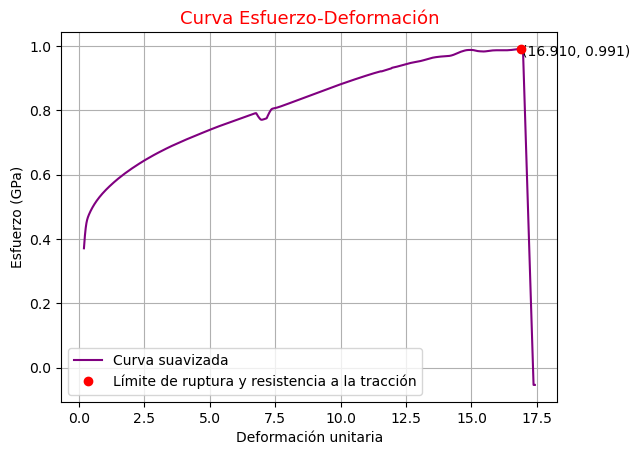

Límite de ruptura y resistencia a la tracción: 0.991 GPa


In [171]:
# Índice del máximo esfuerzo suavizado
idx_max = np.argmax(df["esfuerzo_suav"])  

# Coordenadas del punto máximo
x_max = df["deformacion_suav"].iloc[idx_max]
y_max = df["esfuerzo_suav"].iloc[idx_max]

# Nueva área final
area_final = (9.86 * 0.35)  # mm²
area_metros = area_final * 1e-6

fig, ax = plt.subplots()
#ax.set_xlim(12, 17.1)
#ax.set_ylim(0.988, 0.992)

# Graficar curva suavizada
ax.plot(df["deformacion_suav"], df["esfuerzo_suav"], color="purple", label="Curva suavizada")

# Marcar el punto máximo
ax.plot(x_max, y_max, "ro", label="Límite de ruptura y resistencia a la tracción", zorder=7)
ax.annotate(f"({x_max:.3f}, {y_max:.3f})", 
            xy=(x_max, y_max), xytext=(x_max+0.004, y_max-0.02))
            #arrowprops=dict(arrowstyle="->", color="red"))

ax.set_title("Curva Esfuerzo-Deformación", fontsize=13, color="red")
ax.set_xlabel("Deformación unitaria")
ax.set_ylabel("Esfuerzo (GPa)")
ax.legend()
plt.grid()
plt.show()
print(f"Límite de ruptura y resistencia a la tracción: {y_max:.3f} GPa")


**Cálculos Elongación Total**

In [169]:
long_ini= 50
long_final= 84.17
Cambio_longitud= long_final - long_ini
elongacion_total= (Cambio_longitud/long_ini)*100
print(f"La elongación total es: {elongacion_total:.2f} %")

La elongación total es: 68.34 %
